[*Business Data Science: Combining Machine Learning and Economics to Optimize, Automate, and Accelerate Business*](https://www.amazon.com/Business-Data-Science-Combining-Accelerate/dp/1260452778/ref=sr_1_3?dchild=1&keywords=Business+Data+Science&qid=1618600384&sr=8-3) by Matt Taddy

Author's code [is here](https://github.com/TaddyLab/bds). My notes [are here](https://github.com/mkudija/mkudija.github.io/blob/master/reading/notes/2021-04-16-Business%20Data%20Science.md).


# Introduction
## Stock Return Example
Page 1-3

In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import pandas as pd
import pandas_datareader.data as web

%load_ext watermark
%watermark -iv

pandas            0.24.2
pandas_datareader 0.9.0
matplotlib        3.0.3



In [2]:
# get stock data

index = '^GSPC' # (S&P 500: https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch)
stocks = [index,'FB','JNJ','GOOGL','AAPL','AMZN','AMGN','T','XOM','ORCL',
          'GE','PG','IBM','JPM','KO','PEP','BAC','CSCO']

# Define date range
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 1)
# end = datetime.datetime.now()

# Read stock data from Yahoo
df = web.DataReader(stocks, 'yahoo', start, end)['Adj Close']

df.to_csv('data/data_stocks.csv')
df.tail(2)

Symbols,AAPL,AMGN,AMZN,BAC,CSCO,FB,GE,GOOGL,IBM,JNJ,JPM,KO,ORCL,PEP,PG,T,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,
2016-12-29,27.597061,130.911545,765.150024,20.150553,26.429382,116.349998,28.403091,802.880005,137.285995,103.123985,75.822151,36.157787,35.917824,92.546082,74.543831,32.630871,72.621994,2249.260010
2016-12-30,27.381918,129.520798,749.869995,20.242151,26.221138,115.050003,28.304560,792.450012,136.783325,102.873978,76.175270,36.036110,35.695019,92.228752,74.305229,32.531433,72.549652,2238.830078


In [3]:
# get market cap
marketCap = web.get_quote_yahoo(stocks)['marketCap']
marketCap.tail(2)

XOM      2.398712e+11
^GSPC             NaN
Name: marketCap, dtype: float64

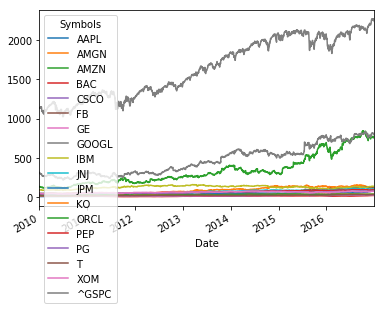

In [4]:
df.plot()

In [5]:
# calculate monthly returns
df = (df
      .reset_index()
      .resample('M', on='Date').mean()
      .pct_change()
      .dropna()
     )
df.to_csv('data/data_stock_returns.csv')
df.tail(2)

Symbols,AAPL,AMGN,AMZN,BAC,CSCO,FB,GE,GOOGL,IBM,JNJ,JPM,KO,ORCL,PEP,PG,T,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,
2016-11-30,-0.043574,-0.104163,-0.074116,0.166856,-0.005722,-0.069577,0.041433,-0.035524,0.039781,-0.008271,0.106890,-0.010074,0.029297,-0.026938,-0.033876,-0.024230,-0.004957,0.010249
2016-12-31,0.038471,0.018134,-0.000013,0.182620,-0.010542,-0.021899,0.049541,0.020246,0.044487,-0.006298,0.129213,0.003336,-0.001808,0.008831,-0.000147,0.100269,0.049941,0.037711


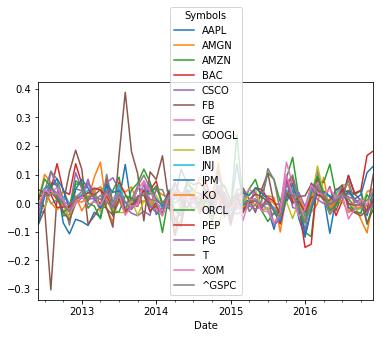

In [6]:
# reproduce Figure I.1 (page 1)
df.plot()

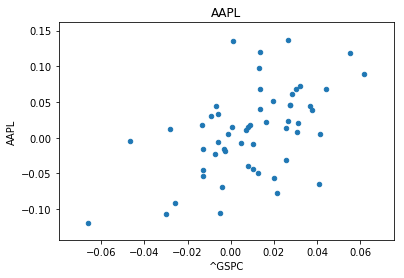

In [7]:
ticker = 'AAPL'
df.plot.scatter(x=index, y=ticker,title=ticker)

In [8]:
# function to fit OLS model

import statsmodels.api as sm
import statsmodels.formula.api as smf

def ols_coeff_sm(x,y):
    '''
    Compute simple OLS regession coefficients.
    '''
    X = x
    Y = y

    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit() # model.summary()
    print(model.summary())

    alpha = model.params[0]
    beta = model.params[1]
    return alpha, beta


import numpy as np

def ols_coeff_np(x,y):
    '''
    Compute simple OLS regession coefficients.
    '''
    
    beta, alpha = np.polyfit(x, y, 1)
    
    return alpha, beta

In [9]:
# compare statsmodels vs numpy

stock = 'AAPL'

alpha, beta = ols_coeff_sm(x=df[index], y=df[stock])
print('sm: \n\talpha = {:.6f} \n\tbeta = {:.6f}'.format(alpha, beta))

alpha, beta = ols_coeff_np(x=df[index], y=df[stock])
print('\n\nnp: \n\talpha = {:.6f} \n\tbeta = {:.6f}'.format(alpha, beta))

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     19.38
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           5.22e-05
Time:                        07:10:36   Log-Likelihood:                 85.446
No. Observations:                  55   AIC:                            -166.9
Df Residuals:                      53   BIC:                            -162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.008     -0.357      0.7

/Users/matthewkudija/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
# create df with computed OLS coefficients, market cap, and font size scaled by market cap
## use linear interpolation formula: https://en.wikipedia.org/wiki/Linear_interpolation (LI)

coeff = pd.DataFrame(index=range(0,1), columns=['alpha','beta','marketCap','fontSize']).fillna(0)
fontMin = 5
fontMax = 40

# LI
y0 = fontMin
y1 = fontMax
x0 = min(marketCap)
x1 = max(marketCap)

for stock in stocks:
#     print('\n\n'+stock)
    alpha, beta = ols_coeff_np(x=df[index], y=df[stock])
    coeff.loc[stock,'alpha'] = alpha
    coeff.loc[stock,'beta'] = beta
    coeff.loc[stock,'marketCap'] = marketCap[stock]
    coeff.loc[stock,'fontSize'] = (y0*(x1-marketCap[stock]) + y1*(marketCap[stock]-x0)) / (x1-x0) # LI
    
coeff = coeff[2:]
coeff.to_csv('data/data_coefficients.csv')

In [11]:
coeff

,alpha,beta,marketCap,fontSize
FB,0.028027,0.042989,8.699370e+11,17.334895
JNJ,0.006035,0.781829,4.271309e+11,10.074639
GOOGL,0.008943,1.032020,1.543801e+12,28.383580
AAPL,-0.002708,1.293610,2.252291e+12,40.000000
AMZN,0.012793,1.263489,1.713715e+12,31.169499
AMGN,0.007673,0.912199,1.472383e+11,5.485516
T,0.003208,0.563423,2.137969e+11,6.576812
XOM,-0.004054,0.892682,2.398712e+11,7.004327
ORCL,-0.001715,1.061023,2.276555e+11,6.804037
GE,0.001477,1.161708,1.176265e+11,5.000000


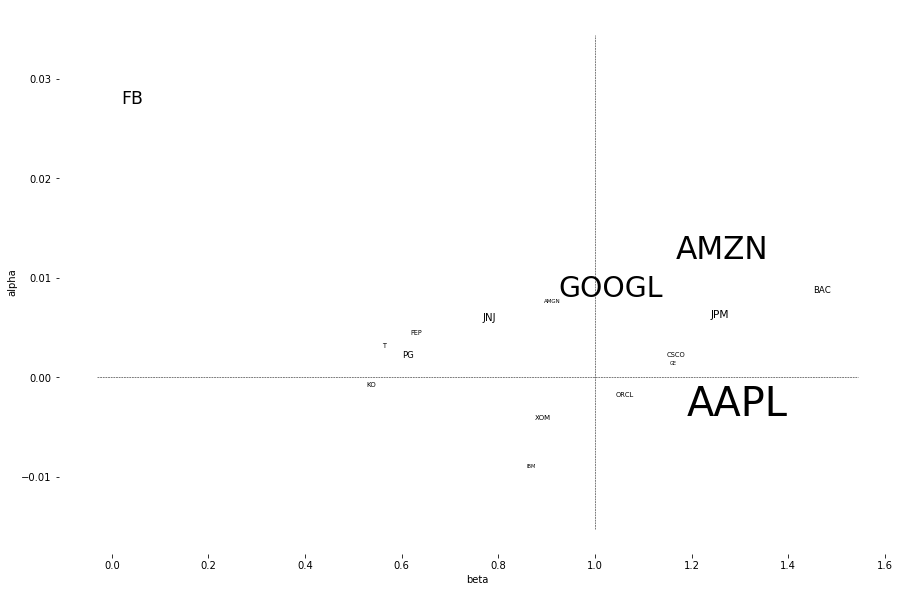

In [12]:
# reproduce Figure I.3 (page 3)

coeff.plot.scatter(x='beta',y='alpha',color='w',figsize=(15,10))
for stock in coeff.index:
    plt.annotate(stock,
                 xy=(coeff.loc[stock,'beta'],coeff.loc[stock,'alpha']),
                 va='center',ha='center',
                 size = coeff.loc[stock,'fontSize'])
ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
plt.plot([min(xmin,0),xmax],[0,0],'k--',linewidth=.5)
plt.plot([1,1],[ymin,ymax],'k--',linewidth=.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('Figure I.3.png', bbox_inches='tight', dpi=300)